In [110]:
import pandas as pd
import numpy as np

In [111]:
donnees_mes = pd.read_excel("../data/donnees_mesures_PM2_5.xlsx")
donnees_env = pd.read_excel("../data/donnees_environnement_capteurs.xlsx")
donnees_mes

,Date,c1,c3,c5,c7,c8,c10,c11,c13,c14,...,c31,c87,c50,c51,c64,c73,c74,c75,c76,c90
0,2023-01-01 00:00:00,4.678,4.496000,4.505000,4.607,2.790,4.222,5.668,5.769,4.416,...,5.810,7.3360,7.312,4.912,27.0110,4.737,3.080,4.009,7.409,3.918
1,2023-01-01 00:15:00,4.439,NaN,NaN,4.330,3.167,4.077,4.423,6.315,5.549,...,5.732,8.2400,5.480,5.259,30.1920,4.764,3.168,3.999,7.021,4.132
2,2023-01-01 00:30:00,4.108,NaN,NaN,4.547,3.081,3.871,4.744,5.356,4.775,...,5.611,NaN,7.717,4.599,19.4200,4.922,3.194,4.231,NaN,4.079
3,2023-01-01 00:45:00,4.713,4.339667,3.982333,4.688,NaN,3.984,5.499,5.329,4.961,...,5.717,8.4075,4.923,4.927,31.3880,4.721,3.517,4.252,6.090,3.876
4,2023-01-01 01:00:00,4.172,3.716000,4.088000,NaN,3.556,3.960,4.833,5.613,4.462,...,5.858,8.7640,4.211,4.539,25.8640,4.651,3.121,4.141,6.178,3.590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25779,2023-09-26 12:45:00,1.768,1.892000,1.529000,2.483,1.824,NaN,2.196,NaN,2.567,...,1.094,2.1650,1.937,3.240,2.2635,5.485,NaN,4.470,2.053,0.762
25780,2023-09-26 13:00:00,1.857,1.792000,1.538000,2.548,2.405,NaN,2.262,NaN,2.857,...,1.145,2.1920,2.532,2.328,2.2690,2.182,NaN,4.658,2.385,0.639
25781,2023-09-26 13:15:00,1.939,1.871000,1.953000,2.207,1.761,NaN,2.056,NaN,2.781,...,1.520,2.2820,3.054,2.312,2.6060,2.625,NaN,3.606,2.855,0.769
25782,2023-09-26 13:30:00,1.959,NaN,2.028000,2.415,1.844,NaN,2.498,NaN,2.914,...,1.245,2.6810,2.054,3.560,2.1560,2.835,NaN,2.318,3.037,1.560


In [112]:
date = donnees_mes['Date']
donnees_mes = donnees_mes.drop(donnees_mes.columns[0], axis=1)

# Remplacement des virgules par des points et conversion en float pour toutes les colonnes
for nom_colonne in donnees_mes.columns:
    donnees_mes[nom_colonne] = donnees_mes[nom_colonne].replace(',', '.').astype(float)

In [113]:
# [['c7', 37.93437790878064], ['c26', 46.95547626434998], ['c27', 41.79336022339435]] with NaN before aberrant

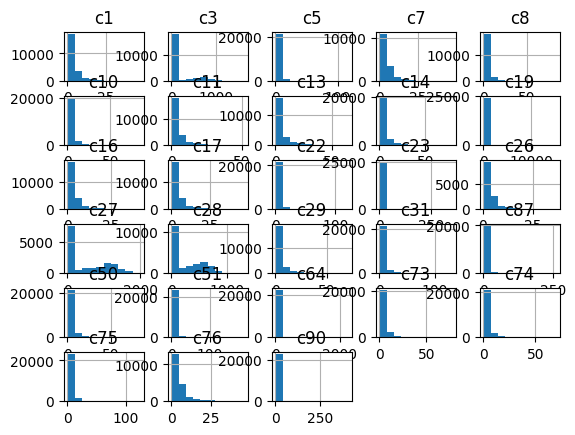

In [114]:
#Suppression des valeurs aberrantes

donnees_mes.hist()
    
for colonne in donnees_mes.columns:
        if pd.api.types.is_numeric_dtype(donnees_mes[colonne]):
            Q1 = donnees_mes[colonne].quantile(0.25)
            Q3 = donnees_mes[colonne].quantile(0.75)
            IQR = Q3 - Q1
            
            # Détection des valeurs aberrantes
            outliers_mask = (donnees_mes[colonne] < (Q1 - 1.5 * IQR)) | (donnees_mes[colonne] > (Q3 + 1.5 * IQR))
            
            # Remplacement des valeurs aberrantes par NaN
            donnees_mes.loc[outliers_mask, colonne] = np.nan
        


[['c7', 42.75907539559417], ['c26', 51.84998448650326], ['c27', 41.79336022339435]]


array([[<Axes: title={'center': 'c1'}>, <Axes: title={'center': 'c3'}>,
        <Axes: title={'center': 'c5'}>, <Axes: title={'center': 'c8'}>,
        <Axes: title={'center': 'c10'}>],
       [<Axes: title={'center': 'c11'}>, <Axes: title={'center': 'c13'}>,
        <Axes: title={'center': 'c14'}>, <Axes: title={'center': 'c19'}>,
        <Axes: title={'center': 'c16'}>],
       [<Axes: title={'center': 'c17'}>, <Axes: title={'center': 'c22'}>,
        <Axes: title={'center': 'c23'}>, <Axes: title={'center': 'c28'}>,
        <Axes: title={'center': 'c29'}>],
       [<Axes: title={'center': 'c31'}>, <Axes: title={'center': 'c87'}>,
        <Axes: title={'center': 'c50'}>, <Axes: title={'center': 'c51'}>,
        <Axes: title={'center': 'c64'}>],
       [<Axes: title={'center': 'c73'}>, <Axes: title={'center': 'c74'}>,
        <Axes: title={'center': 'c75'}>, <Axes: title={'center': 'c76'}>,
        <Axes: title={'center': 'c90'}>]], dtype=object)

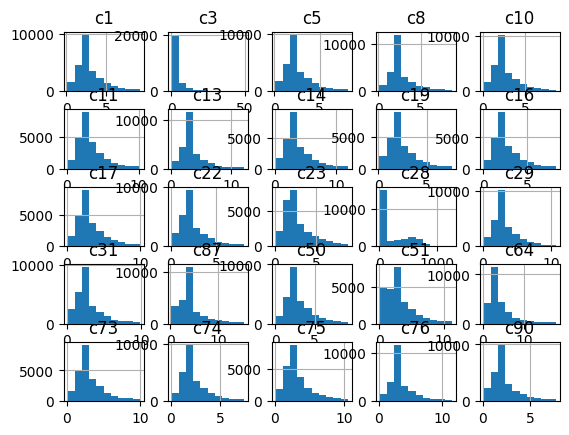

In [115]:
# Supression des colonnes aberrantes et remplissage des valeurs nulles

# Compter le nombre de valeurs manquantes par colonne
nombre_na_par_colonne = donnees_mes.isna().sum()

# Supprimer les colonnes avec un pourcentage de valeurs manquantes supérieur à 33%
colonnes_del = []
for nom_colonne, nombre_na in nombre_na_par_colonne.items():
    if nombre_na / len(donnees_mes) > 0.33:
        colonnes_del.append([nom_colonne,nombre_na*100/len(donnees_mes)])
        donnees_mes = donnees_mes.drop(nom_colonne, axis=1)
        

# Remplir les valeurs manquantes restantes avec la médiane de chaque colonne
donnees_mes = donnees_mes.fillna(donnees_mes.median())

print(colonnes_del)
donnees_mes.hist()

In [116]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données
nom_colonnes = list(donnees_mes.columns)
scaler = StandardScaler()
X = donnees_mes.to_numpy()
X = scaler.fit_transform(X)
mes_normees = pd.DataFrame(X)
mes_normees


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.956658,-0.041753,1.261578,-0.039702,0.962297,1.191981,0.971311,0.253054,1.043582,0.765200,...,1.624061,1.107693,2.551029,0.782036,-0.246112,0.808431,0.528236,0.344503,1.898089,1.121924
1,0.815746,-0.282804,-0.200110,0.210306,0.867751,0.529924,1.233311,0.762299,1.068476,0.528768,...,1.580321,1.436124,1.458932,0.928933,-0.246112,0.823004,0.595066,0.339475,1.699104,1.272354
2,0.620592,-0.282804,-0.200110,0.153275,0.733431,0.700623,0.773132,0.414412,0.429546,0.727499,...,1.512467,-0.228555,2.792458,0.649532,-0.246112,0.908285,0.614812,0.456124,-0.176897,1.235098
3,0.977294,-0.073474,0.904246,-0.203501,0.807111,1.102112,0.760176,0.498013,0.486939,0.898113,...,1.571909,1.496978,1.126892,0.788386,-0.246112,0.799795,0.860109,0.466683,1.221642,1.092400
4,0.658325,-0.200019,0.976487,0.468272,0.791462,0.747951,0.896454,0.273729,1.113422,0.753698,...,1.650978,1.626497,0.702453,0.624131,-0.246112,0.762012,0.559373,0.410872,1.266773,0.891359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25779,-0.759049,-0.570118,-0.773025,-0.680307,-0.206811,-0.654334,-0.200492,-0.578009,-0.800601,-0.210560,...,-1.020562,-0.770975,-0.653130,0.074218,-0.669704,1.212165,-0.224362,0.576292,-0.848729,-1.096561
25780,-0.706575,-0.590408,-0.766872,-0.295016,-0.206811,-0.619237,-0.200492,-0.447663,-0.273692,-0.197780,...,-0.991962,-0.761165,-0.298437,-0.311864,-0.667935,-0.570633,-0.224362,0.670818,-0.678463,-1.183023
25781,-0.658229,-0.574379,-0.483149,-0.722085,-0.206811,-0.728782,-0.200492,-0.481823,-0.414754,-0.211838,...,-0.781671,-0.728467,0.012739,-0.318637,-0.559503,-0.331523,-0.224362,0.141876,-0.437424,-1.091640
25782,-0.646437,-0.282804,-0.431874,-0.667044,-0.206811,-0.493738,-0.200492,-0.422044,-0.755655,-0.389481,...,-0.935884,-0.583507,-0.583383,0.209686,-0.704293,-0.218175,-0.224362,-0.505726,-0.344086,-0.535613


In [117]:
mes_normees.columns=nom_colonnes
mes_normees.insert(0, 'Date', date)


In [118]:
mes_normees.to_csv("../preprocessing/donnees_mesures_PM2_5.csv",index=False,sep=';')